# Take-Home Exam 3: Statistical Tests

*In this take-home exam, you are going to perform hypothesis testing in different scenarios involving various data types.*

**Submission Instructions**

---
Copy this assignment to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th3`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to the TAs and LAs.

---

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from os.path import join
import copy
import random

%matplotlib inline

## Spearman rank correlation

In recitation 6, we talked about Pearson's correlation function, which calculates **the linear correlation among two continuous variables**. The function yields a correlation coefficient between -1 (perfect negative correlation) and 1 (perfect positive correlation). However, in order to deal with the correlation among variables of different data types we need further statistical functions. 

Spearman's correlation function calculates the correlation between two **ordinal variables** (in addition, interval or ratio scale are also accepted), where there is an order/ranking among the values. The function returns a correlation coefficient, again between -1 (negatively perfect) and 1 (positively perfect), that signifies the strength and direction of the monotonic relationship between the variables.

![](https://statistics.laerd.com/statistical-guides/img/spearman-1-small.png)

In this problem, you are going to be working on a dataset that stores house sales prices and characteristics in Seattle and King County, WA, USA. Your goal is to measure the correlation between the quality of house view (ranked between 0-4) and its condition (ranked between 1-5). However, the dataset is split into two folds. The view quality is stored in a file named `"house_sales.csv"` and the condition values are stored in `"house_conditions.csv"`. In both datasets, the `id` columns link corresponding houses. After you merge these datasets, your task is to measure the relationship between view quality and house condition with Spearman's rank correlation function.

In [0]:
sales_filename = "house_sales.csv"

df_sales = pd.read_csv(join(path_prefix, sales_filename))
df_sales.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [0]:
condition_filename = "house_condition.csv"

df_cond = pd.read_csv(join(path_prefix, condition_filename))
df_cond.head(3)

,id,condition
0,6209000165,3
1,629000605,4
2,3268000040,5


### Task 1: Joining Datasets

As stated in the problem statement, you have two different datasets that store the same house ids, but in different order. Your first task is to merge them into a single dataframe with respect to the given house ids in both dataframe. At the end, print the top 3 rows of the merged dataframe.

*Hint*: You may check the [third recitation](https://colab.research.google.com/drive/182nt4hDpzpfPqVZ3wkQMCprnimN8tBoH) material for some examples.

In [0]:
# your code
new_df = pd.merge(df_sales, df_cond, on='id')
new_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,3
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,3
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3


### Task 2: Correlation Measurement

Now, you need to perform the correlation measurement with the help of Scipy's `spearmanr` function. You may check its documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html).

As stated in the problem description, the `view` column takes values between 0-4, while the `condition` column is from 1-5. You need to make sure that both variables consists of the same rank values, either between 0-4 or 1-5.

Then, extract the values from `view` and `condition` columns from the merged dataframe and provide them as parameters for the correlation functions. Once you obtain the correlation coefficent comment on the relationship between them.

In [0]:
# your code
#new_df['view'] += 1
#new_df.tail(3)
df_with_view_condition = new_df[['condition', 'view']]
df_with_view_condition.head()

,condition,view
0,3,1
1,3,1
2,3,1
3,5,1
4,3,1


In [0]:
stats.spearmanr(df_with_view_condition['condition'], df_with_view_condition['view'])

SpearmanrResult(correlation=0.04550296389959844, pvalue=2.6435912777732715e-11)

<font color="blue">[Double Click to Type Your Comments]</font>

Since correlation value is low as 0.045, they are not correlated at all. Also p-value being smaller than 0.05 means that this didn't happen by chance, strong evidence is evident for the correlation.

## Point-Biserial Correlation

In the case of ranked/ordinal values, you utilized Spearman's correlation function. However, you are also going to deal with additional data types in your projects. `Point-Biserial` correlation function calculates a correlation coefficient (-1 -> negatively perfect, 1 -> positvely perfect) that signifies the strength and direction of association between a binary and a continuous variables.

In this problem, you have a dataset that describes the attributes affecting the admission rates for graduate programs. Each row corresponds to a unique application with listed attributes. And The column `Chance of Admit` is the admission probability for that application. In this problem, we are interested in the relationship between the admission rates and the prior research experience of the applicants. As you can observe below, the column `Research` is a binary variable in which `0` corresponds to no experience, while `1` states that the applicant has a research experience. In addition, the `Chance of Admit` column is a continuous variable.

Now, you need to calculate the correlation between the research experience and the admission rates.

In [0]:
admission_filename = "admissions.csv"
df_admissions = pd.read_csv(join(path_prefix, admission_filename))
df_admissions.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [0]:
df_admissions["Research"].unique()

array([1, 0])

### Task 1: Fixing a Column Name

In the `adminssions` dataset, the `Chance of Admit` column has an extra whitespace at the end. For instace, in order to retrieve the values in that column, you have to type `df_admissions["Chance of Admit "]`, which is very inconvenient.

Fix this issue by removing that extra whitespace from the column name. At the end, print the column names in the resulting dataframe.

In [0]:
# your code
df_admissions=df_admissions.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df_admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Task 2: Calculating the Correlation

Now you are going to find the point-biserial correlation coefficient. To this end, extract the binary variable `Research` and continuous variable `Chance of Admit` from the dataframe and find the correlation coefficient. 

In this task, you may use Scipy's [pointbiserialr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html) function to obtain the coefficient. Once you obtain the correlation coefficent comment on the relationship between them.

In [0]:
# your code
stats.pointbiserialr(df_admissions['Chance of Admit'], df_admissions['Research'])

PointbiserialrResult(correlation=0.5532021370190403, pvalue=1.9181733806921424e-33)

<font color="blue">[Double Click to Type Your Comments]</font>

They are positively correlated but moderately, since the correlation value is 0,55. Also p-value being smaller than 0.05 means that this didn't happen by chance and strong evidence is evident for the correlation.


## Random Permutation Tests

One of the assumptions behind Point-Biserial Function is that the continuous variable should be approximately normally distributed for each category in the binary variable. However, that's not the case in our problem, as you can observe in the figure below.

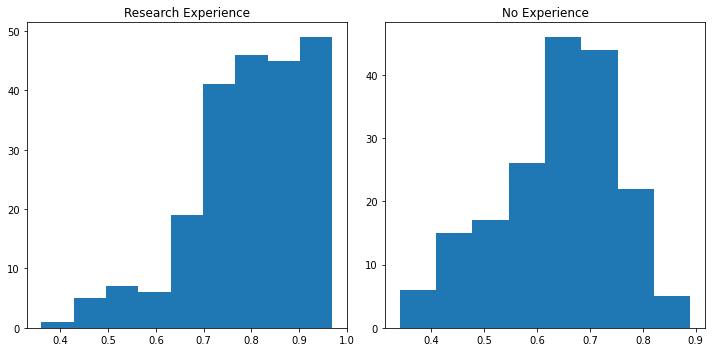

In [0]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].hist(df_admissions[df_admissions["Research"] == 1]["Chance of Admit"], bins="scott", label="Research Exp.")
axes[1].hist(df_admissions[df_admissions["Research"] == 0]["Chance of Admit"], bins="scott", label="No Exp.")

axes[0].set_title("Research Experience")
axes[1].set_title("No Experience")

plt.tight_layout()
plt.show()

The majority of the statistical tests that we have been talking about make a sort of assumption about the distribution of the data, for instance normal distribution in Point-Biserial and many other. But as you can imagine, these assumptions cannot always be true. They can however be approximately close enough to give you a useful result.

In order not to deal with these assumptions, you can perform `Random Permutation Tests` in which there is no underlying assumption regarding the data. 

Basically, you are going to utilize a permutation test for your point-biserial coefficient to show that it's statistically significant and is hardly explaind by chance.

Before you begin, please read more about the random permutation tests from the links below .

https://towardsdatascience.com/how-to-assess-statistical-significance-in-your-data-with-permutation-tests-8bb925b2113d

https://www.jwilber.me/permutationtest/

### Task 1: Implementation

Below, you can observe the required steps to perform a permutation test for this problem.

---

1. Compute the correlation coefficient between *research* and *Chance of Admit* variables and assign the result to a variable named *observed_coefficient*.
2. Randomly shuffle *Chance of Admit* values while keeping the *research* values unchanged.
3. Compute the correlation coefficient for the new values and store it in a list named *coeffs*.
4. Repeat 3 and 4 many times, let's say $10^5$.

---

Once your iterations are completed, the variable *coeffs* is actually the sampling distribution of your correlation coefficients. In order to calculate the p_value of your *observed_coefficient*, you need to find the ratio of randomly obtained coefficients that are greater than equal to your *observed_coefficient* in absolute values. More formally, $p\_value \, = \, \large{\frac{\# \; of \;  |coefficients| \; \geq \; |observed\_coefficient|}{\# \; of \; total \; coefficients}}$

Once you obtain the p_value comment on the significance of your original correlation coefficient, with the level of significance, $\alpha$, set to 0.05.

*For thisk task, you may check the exercise solution of recitation 6.*

In [0]:
# your code
observed_coefficient = stats.pointbiserialr(df_admissions['Chance of Admit'], df_admissions['Research'])
print(observed_coefficient)

PointbiserialrResult(correlation=0.5532021370190403, pvalue=1.9181733806921424e-33)


In [0]:
#Compute ground truth correlation:
[r,pv] =stats.pearsonr(df_admissions.iloc[:,7],df_admissions.iloc[:,8])
#Copy one of the features:
pS = copy.copy(df_admissions.iloc[:,7])
#Initialize variables:
pR = []
#Choose number of permutations:
p=100000
#Initialize permutation loop:
for i in range(0,p):
  #Shuffle one of the features:
    random.shuffle(pS)
    #Computed permuted correlations and store them in pR:
    pR.append(stats.pearsonr(pS,df_admissions.iloc[:,8])[0])
    

#Significance:
p_val = len(np.where(np.abs(pR)>=np.abs(r))[0])/p
print(p_val)

0.0


<font color="blue">[Double Click to Type Your Comments]</font>

Since the p_value is 0, this didn't happen by chance and that was what we were searching for. It is lower than 0.05, so correlation value is stastically significant.